# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [112]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [113]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tecozautla
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | pallasovka
Processing Record 5 of Set 1 | waiouru
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | conceicao do araguaia
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | ferrandina
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hranice
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | ambon
Pro

City not found. Skipping...
Processing Record 36 of Set 4 | kalemie
Processing Record 37 of Set 4 | sungairaya
Processing Record 38 of Set 4 | juifang
City not found. Skipping...
Processing Record 39 of Set 4 | north battleford
Processing Record 40 of Set 4 | abaetetuba
Processing Record 41 of Set 4 | bluffton
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | batagay
Processing Record 44 of Set 4 | inirida
Processing Record 45 of Set 4 | banda aceh
Processing Record 46 of Set 4 | vanavara
Processing Record 47 of Set 4 | hit
Processing Record 48 of Set 4 | vitoria da conquista
Processing Record 49 of Set 4 | marck
Processing Record 0 of Set 5 | ola
Processing Record 1 of Set 5 | camacha
Processing Record 2 of Set 5 | pacifica
Processing Record 3 of Set 5 | kourou
Processing Record 4 of Set 5 | bihariganj
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | aksarka
Processing Record 7 of Set 5 | el limon
Processing Record 8 of Set 5 | xining
Proc

Processing Record 27 of Set 8 | sinkat
City not found. Skipping...
Processing Record 28 of Set 8 | rorvik
Processing Record 29 of Set 8 | kropotkin
Processing Record 30 of Set 8 | canto do buriti
Processing Record 31 of Set 8 | samusu
City not found. Skipping...
Processing Record 32 of Set 8 | kalomo
City not found. Skipping...
Processing Record 33 of Set 8 | esmeraldas
Processing Record 34 of Set 8 | puerto escondido
Processing Record 35 of Set 8 | fairbanks
Processing Record 36 of Set 8 | miquelon
Processing Record 37 of Set 8 | ancud
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | barrow
Processing Record 40 of Set 8 | niteroi
Processing Record 41 of Set 8 | provideniya
Processing Record 42 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 8 | pousat
City not found. Skipping...
Processing Record 44 of Set 8 | poum
Processing Record 45 of Set 8 | viedma
Processing Record 46 of Set 8 | mount isa
Processing Record 47 of Set 8 | cock

Processing Record 16 of Set 12 | kodino
Processing Record 17 of Set 12 | belle fourche
Processing Record 18 of Set 12 | santa fe do sul
Processing Record 19 of Set 12 | sangar
Processing Record 20 of Set 12 | kaeo
Processing Record 21 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 22 of Set 12 | vilhena
Processing Record 23 of Set 12 | bahia honda
Processing Record 24 of Set 12 | cap malheureux
Processing Record 25 of Set 12 | srandakan
Processing Record 26 of Set 12 | caernarfon
Processing Record 27 of Set 12 | palu
Processing Record 28 of Set 12 | maraba
Processing Record 29 of Set 12 | meulaboh
Processing Record 30 of Set 12 | great yarmouth
Processing Record 31 of Set 12 | show low
Processing Record 32 of Set 12 | destin
Processing Record 33 of Set 12 | vila franca do campo
Processing Record 34 of Set 12 | avera
Processing Record 35 of Set 12 | orlovskiy
Processing Record 36 of Set 12 | chumikan
Processing Record 37 of Set 12 | viligili
City not found. Skipping.

In [114]:
#check format of received data
print(city_data[0])

{'City': 'tecozautla', 'Lat': 20.5333, 'Lng': -99.6333, 'Max Temp': 18.79, 'Humidity': 43, 'Cloudiness': 0, 'Wind Speed': 4.65, 'Country': 'MX', 'Date': 1674692174}


In [134]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [135]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tecozautla,20.5333,-99.6333,18.79,43,0,4.65,MX,1674692174
1,castro,-24.7911,-50.0119,19.61,70,2,3.41,BR,1674692175
2,pallasovka,50.0500,46.8833,-7.94,63,5,1.52,RU,1674692176
3,waiouru,-39.4833,175.6667,21.35,44,84,0.79,NZ,1674692177
4,ushuaia,-54.8000,-68.3000,5.75,86,76,2.25,AR,1674692070


In [136]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [137]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
#convert Date
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s').dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tecozautla,20.5333,-99.6333,18.79,43,0,4.65,MX,2023-01-26
1,castro,-24.7911,-50.0119,19.61,70,2,3.41,BR,2023-01-26
2,pallasovka,50.0500,46.8833,-7.94,63,5,1.52,RU,2023-01-26
3,waiouru,-39.4833,175.6667,21.35,44,84,0.79,NZ,2023-01-26
4,ushuaia,-54.8000,-68.3000,5.75,86,76,2.25,AR,2023-01-26


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

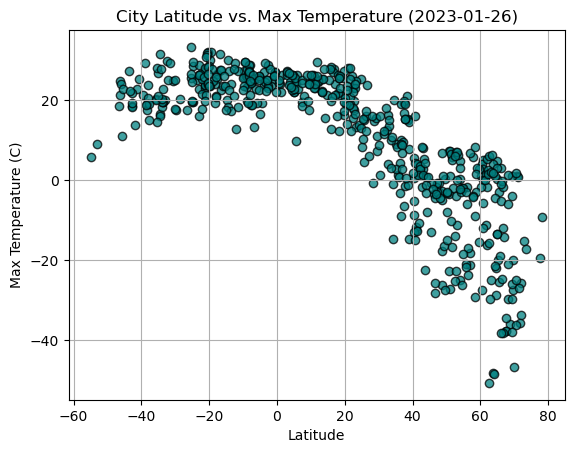

In [138]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="teal", edgecolors="black",
            alpha=0.75)
today = city_data_df['Date'].iloc[0]
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

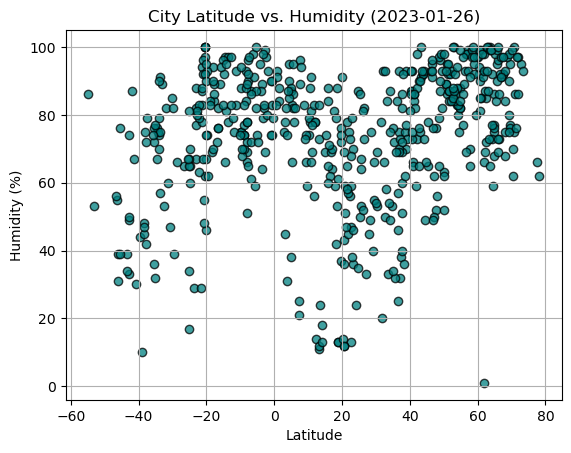

In [140]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="teal", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

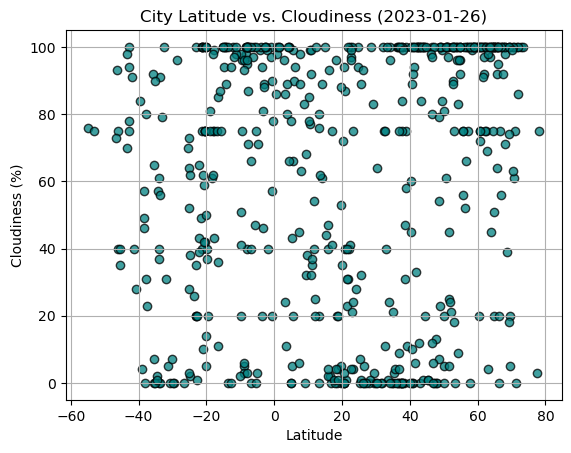

In [141]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="teal", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

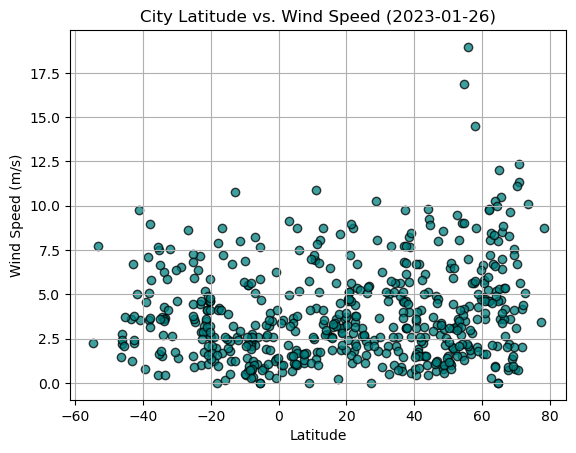

In [142]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="teal", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [143]:
# Define a function to create Linear Regression plots
def lin_reg(x,y,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}.')
    minx = x.min()
    maxy = y.max()
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(minx,maxy),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

In [144]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tecozautla,20.5333,-99.6333,18.79,43,0,4.65,MX,2023-01-26
2,pallasovka,50.0500,46.8833,-7.94,63,5,1.52,RU,2023-01-26
10,ferrandina,40.5012,16.4547,5.58,93,89,3.49,IT,2023-01-26
12,severo-kurilsk,50.6789,156.1250,-3.40,89,100,6.46,RU,2023-01-26
14,nanortalik,60.1432,-45.2371,1.08,97,100,4.86,GL,2023-01-26


In [145]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castro,-24.7911,-50.0119,19.61,70,2,3.41,BR,2023-01-26
3,waiouru,-39.4833,175.6667,21.35,44,84,0.79,NZ,2023-01-26
4,ushuaia,-54.8000,-68.3000,5.75,86,76,2.25,AR,2023-01-26
5,conceicao do araguaia,-8.2578,-49.2647,24.12,93,98,0.65,BR,2023-01-26
6,bredasdorp,-34.5322,20.0403,16.52,76,2,1.53,ZA,2023-01-26


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8122647511567723.


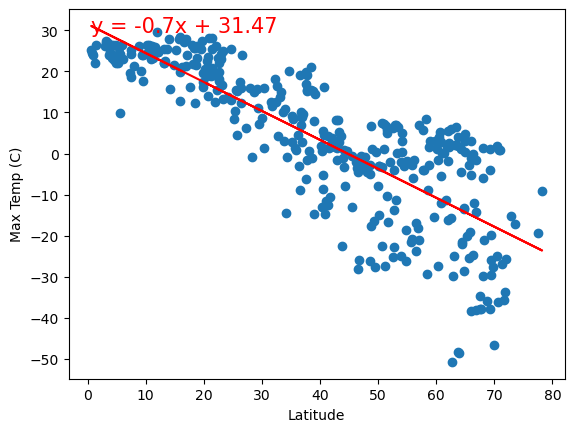

In [146]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Max Temp (C)")

The r-value is: 0.34588529671989127.


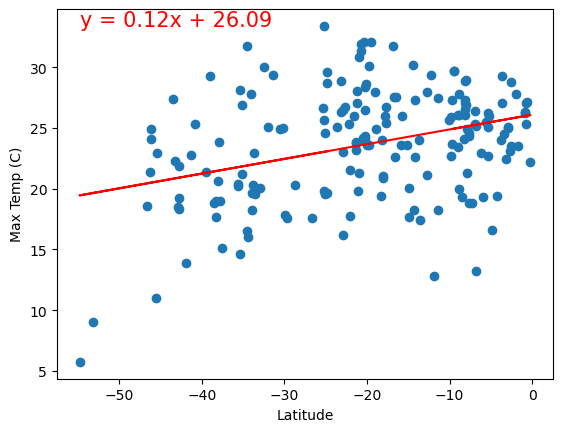

In [147]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Max Temp (C)")

**Discussion about the linear relationship:** There seems to be a very strong negative correlation between the latitude and temperature in the northern hemisphere. As you move further north (further from the equator), temperature drops. This makes sense since it is winter. In the southern hemisphere, there seems to be a weak positive correlation. As you move further north (closer to the equator), temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39975172290803046.


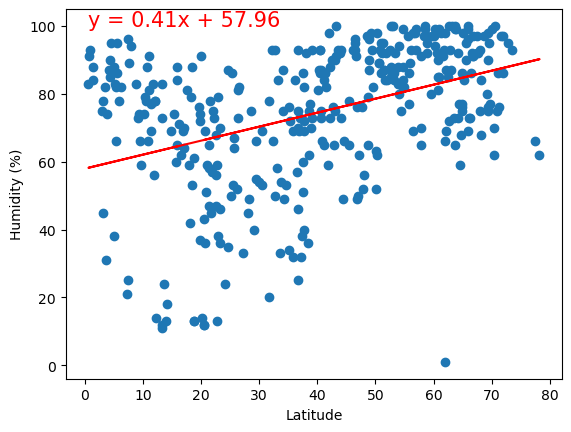

In [148]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],"Humidity (%)")

The r-value is: 0.5093387893834849.


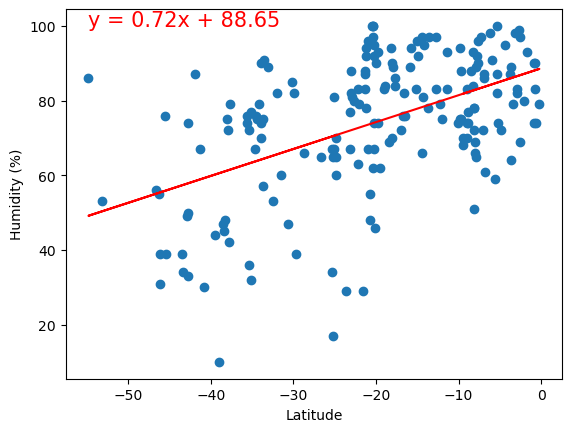

In [149]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Humidity (%)")

**Discussion about the linear relationship:** There is a weak positive correlation between the latitude and humidity in the northern hemisphere. As you move further north (further from the equator), humidity tends to increase. Around the equator, humidity is diverse; near the pole, cities tend to have high humidity. In the southern hemisphere, there is a positive correlation. As you move further north (closer to the equator), humidity tends to increase. The variation seems to be less around the equator and more as you approach the pole.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2718212960732891.


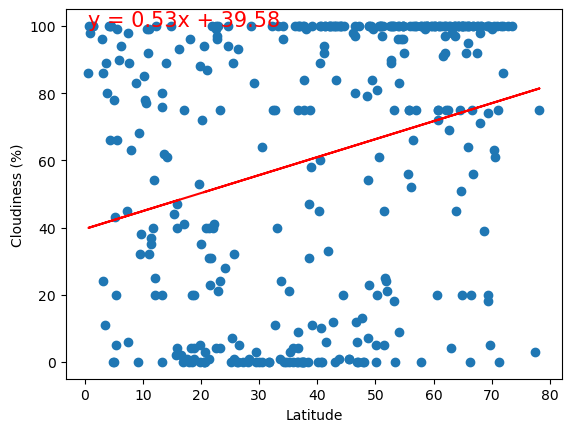

In [150]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Cloudiness (%)")

The r-value is: 0.23351841905104342.


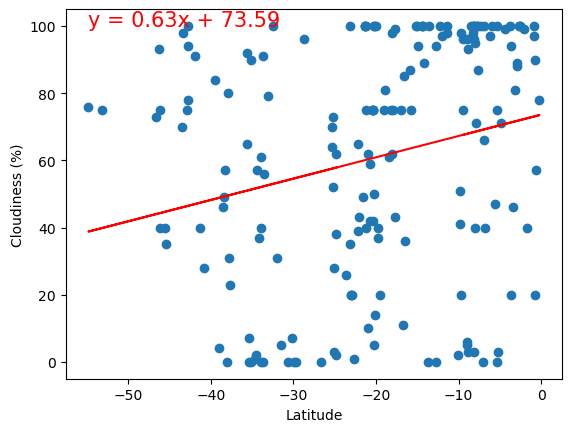

In [151]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Cloudiness (%)")

**Discussion about the linear relationship:** In both hemispheres, there is weak, positive correlation between latitude and cloudiness. It is likely that other factors, other than latitude, that are having a greater effect on the percent cloudiness of the cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1992220487803096.


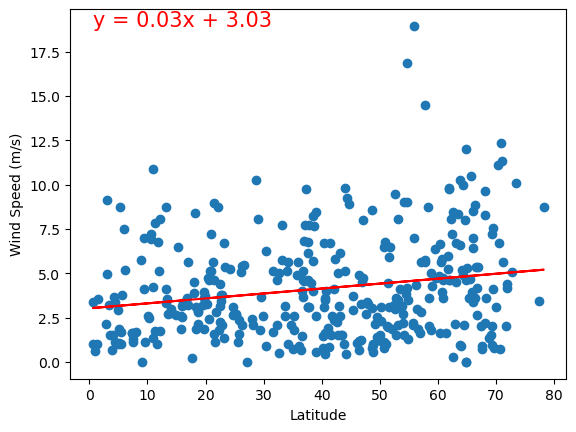

In [152]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Wind Speed (m/s)")

The r-value is: -0.2315854765210136.


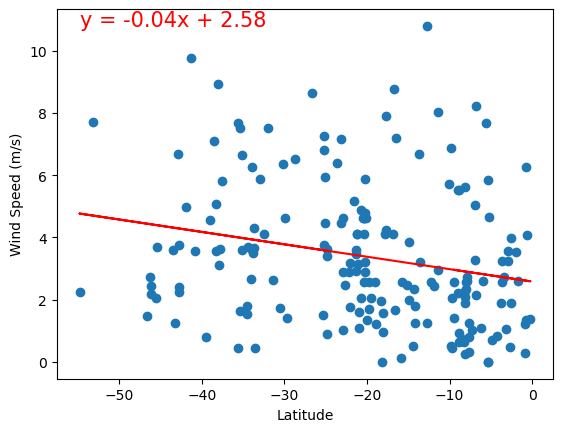

In [153]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Wind Speed (m/s)")

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and wind speed in the northern hemisphere and a weak negative correlation in the southern hemisphere. In general, the wind speed seems lower in the southern hemisphere than in the northern hemisphere. There also seems to be more variation of speeds in the northern hemisphere. This is likely to it being winter.